<a href="https://colab.research.google.com/github/CamiloM21/ClasesCamiloMunoz/blob/master/Clases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CLASE 2.

algoritmos de caja blanca y algoritmos caja negra: arboles de decision
Un arbol de decision claisifca una observacion siguiendo una serie de divisiones binarias basadas en las caracteristicas de la muestra, el arbol comienza en un nodo raiz, donde se evaluan las caracterisiticas. este proceso continua hasta llegar a un nodo terminal, que es el que asigna una clase a la observacion.
#metodos para seleccionar las divisiones
gini impurity: mide la impureza de un nodo, cuanto menor sea la impuerza, mas homogenea sera la clase de ese nodo.
-Entropia(cruzada de shanon):La entropia mide la cantidad de desorden o incertidumbre de una division. la idea es reducir la entropia de un conjunto de datos mediante la division en nodos mas homogeneos.
-indice de gini vs entropia: Ambos se utilizan para elegir el mejor punto de corte,aunque el indice de gini es mas popular debido a su simplicidad y rapidez computancional. Sin embargo, la entropia tiende a ser mas informativa en divisiones con muchas clases.

**no hacer proyectos con arboles de decision porque tienden a sobreentrenarse**
otras opciones es en  Gradient Boosting, aprende del anterior arbol y no repite datos.
 Gradient Boosting es bueno, tiene mas precision
 **XGBOOST (xtreme gratiang boosting)**
11.2.2 Ventajas de los √°rboles de decisi√≥n para clasificaci√≥n
Interpretabilidad: Los √°rboles de decisi√≥n son modelos muy f√°ciles de interpretar y visualizar. Cada nodo y rama representan una regla de decisi√≥n que puede explicarse f√°cilmente.
No requieren normalizaci√≥n de los datos: A diferencia de otros modelos como las m√°quinas de soporte vectorial (SVM) o las regresiones lineales, los √°rboles de decisi√≥n no requieren que los datos sean normalizados o estandarizados.
Manejo de datos categ√≥ricos y num√©ricos: Los √°rboles pueden manejar tanto variables num√©ricas como categ√≥ricas sin necesidad de transformarlas (por ejemplo, a variables dummy).
Resistencia a los valores at√≠picos: Los √°rboles no se ven muy afectados por outliers, ya que los puntos extremos no suelen influir en el valor de la divisi√≥n.
Autom√°tica selecci√≥n de variables importantes: Los √°rboles de decisi√≥n pueden identificar qu√© variables son m√°s relevantes para la clasificaci√≥n.
11.2.3 Desventajas de los √°rboles de decisi√≥n para clasificaci√≥n
Overfitting: Los √°rboles de decisi√≥n tienden a sobreajustarse a los datos de entrenamiento, especialmente cuando se permiten √°rboles muy profundos. Esto se debe a que pueden aprender detalles muy espec√≠ficos que no generalizan bien a nuevos datos.
Inestabilidad: Un peque√±o cambio en los datos de entrenamiento puede llevar a una estructura de √°rbol completamente diferente.
Modelo sesgado en clases desbalanceadas: Si los datos est√°n desbalanceados, el √°rbol puede predecir predominantemente la clase mayoritaria.
11.2.4 Estrategias para evitar el overfitting
Existen varias t√©cnicas que se pueden aplicar para reducir el sobreajuste en √°rboles de decisi√≥n:

Poda (Pruning): La poda elimina ramas del √°rbol que tienen poca importancia o que sobreajustan los datos. Se pueden usar m√©todos como el Cost Complexity Pruning para realizar una poda que elimine ramas que no mejoren significativamente la precisi√≥n del modelo.
Limitaci√≥n de la profundidad del √°rbol: Limitar la profundidad m√°xima del √°rbol es una forma sencilla de evitar que el √°rbol crezca demasiado, lo que podr√≠a llevar a un sobreajuste.
M√≠nimo n√∫mero de muestras por hoja: Establecer un n√∫mero m√≠nimo de observaciones para permitir una divisi√≥n en cada nodo o para que un nodo sea terminal puede ayudar a evitar divisiones demasiado espec√≠ficas.
M√©todos de ensamblaje: T√©cnicas como Random Forest y Gradient Boosting combinan m√∫ltiples √°rboles de decisi√≥n para mejorar la robustez y reducir el riesgo de sobreajuste.





elegir nodos de un arbol de decision:
impureza: cuando el nodo no tiene datos de una sola clase
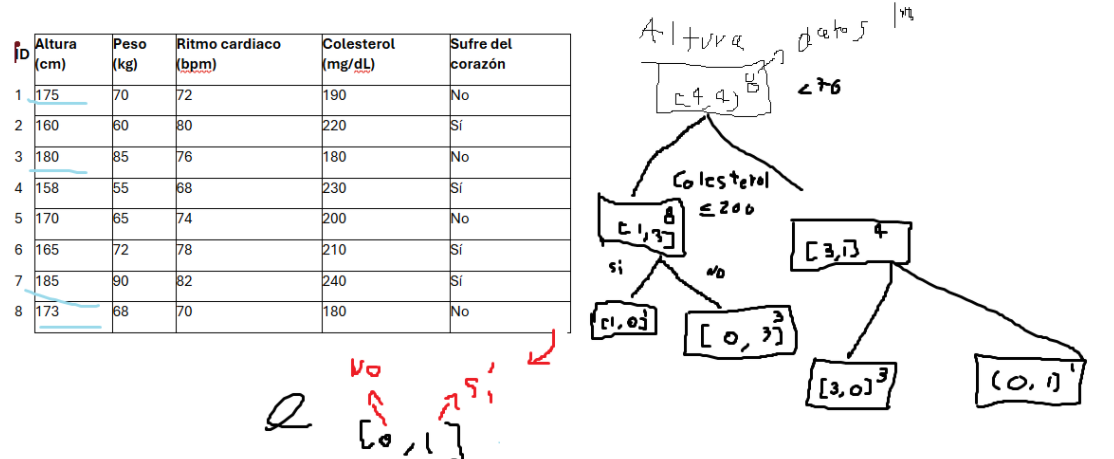

podar: pruning es quitar las ramas que no mejoran el rendimiento del modelo, para evitar que se sobreentrene es mejor podar
calcular el gini esta en word üòä
criterion‚Äúgini‚Äù, ‚Äúentropy‚Äù, ‚Äúlog_loss

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np


# Crear el conjunto de datos
data = {
    "Horas de Estudio": ["Alta", "Baja", "Baja", "Alta", "Alta","Baja", "Alta", ],
    "Asistencia": ["Buena", "Buena", "Mala", "Mala", "Buena","Buena", "Mala",],
    "Resultado": ["S√≠", "No", "No", "S√≠", "S√≠","No", "No",]
}

df = pd.DataFrame(data)
df

Horas de Estudio Asistencia Resultado
0             Alta      Buena        S√≠
1             Baja      Buena        No
2             Baja       Mala        No
3             Alta       Mala        S√≠
4             Alta      Buena        S√≠
5             Baja      Buena        No
6             Alta       Mala        No

In [ ]:
# Codificar variables categ√≥ricas a num√©ricas
encoder = LabelEncoder()
df_encoded = df.apply(encoder.fit_transform)

# Separar caracter√≠sticas y etiqueta
X = df_encoded[["Horas de Estudio", "Asistencia"]]
y = df_encoded["Resultado"]


#Dado que son muy pocos datos no vamos a dividir en entrenamiento y pruebas, usaremos la data tanto para entrenar como para probar.


In [ ]:
# Crear el modelo de √Årbol de Decisi√≥n
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X, y)

# Hacer predicciones
y_pred = tree_clf.predict(X)

# Evaluaci√≥n del modelo
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)


In [ ]:
# Imprimir los resultados
print("Precisi√≥n del modelo:", accuracy)
print("Matriz de confusi√≥n:\n", conf_matrix)

Precisi√≥n del modelo: 0.8571428571428571
Matriz de confusi√≥n:
 [[4 0]
 [1 2]]


In [ ]:
# Verificar si hay m√°s de una clase en y_test para calcular el ROC AUC
if len(np.unique(y)) > 1:
    roc_auc = roc_auc_score(y, tree_clf.predict_proba(X)[:, 1])
else:
    roc_auc = "No se puede calcular ROC AUC (solo una clase en y_test)"


print("√Årea bajo la curva ROC:", roc_auc)

√Årea bajo la curva ROC: 0.9583333333333333


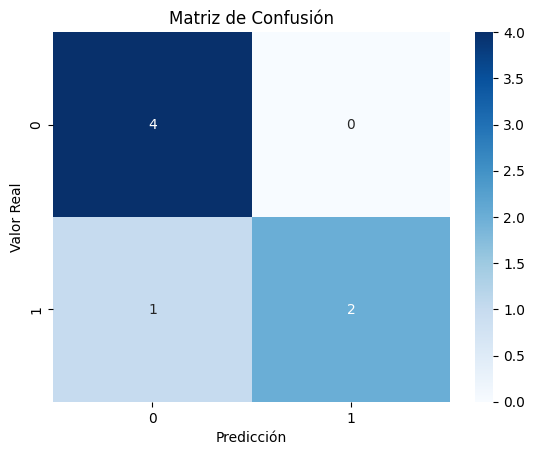

In [ ]:
#Grafique la matriz confusi√≥n en mapa de calor con seaborn
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicci√≥n')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusi√≥n')
plt.show()

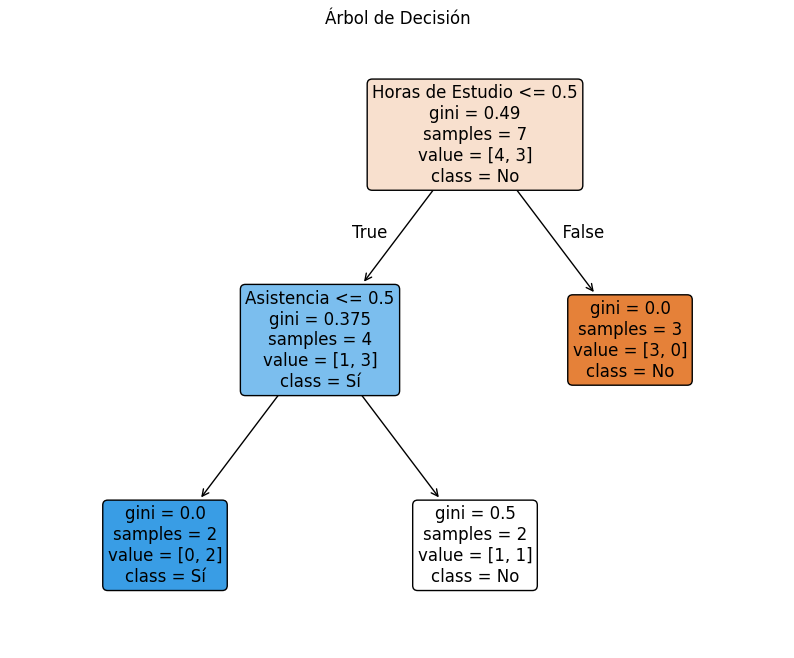

In [ ]:
# Graficar el √°rbol de decisi√≥n
plt.figure(figsize=(10, 8))
plot_tree(tree_clf, filled=True, feature_names=["Horas de Estudio", "Asistencia"], class_names=["No", "S√≠"], rounded=True, fontsize=12)
plt.title("√Årbol de Decisi√≥n")
plt.show()


la viable del nodo raiz se escoge con el gini mas alto criterio de division.


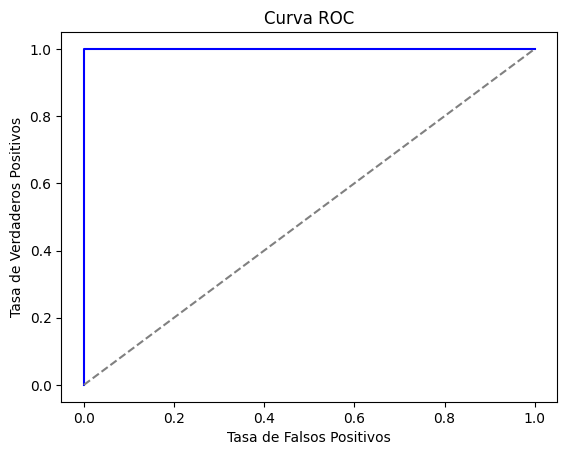

In [ ]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, tree_clf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.show()


elif5 se usa para mostrar el arbol y explicarlo de manera muy clara

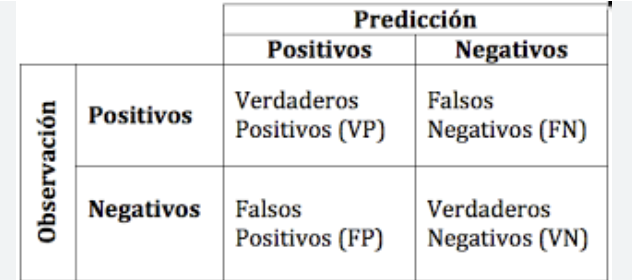

# *Ojo con esto*

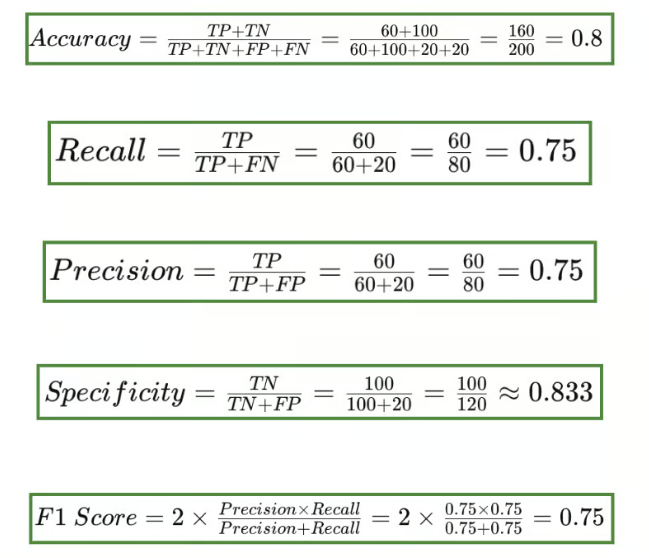